In [14]:
import matplotlib.pyplot as plt
from umap import UMAP
from ds2lsom import DS2LSOM
from sklearn.datasets import load_digits

In [10]:
mnist_X = load_digits().images.reshape(1797, -1)
mnist_y = load_digits().target
clusterer = DS2LSOM(n_prototypes=300, threshold=2, method="som")
clusterer.fit(mnist_X)
clusters = clusterer.predict(mnist_X)

In [11]:
reducer = UMAP(densmap=True)
embedding = reducer.fit_transform(X=mnist_X)

Text(0.5, 1.0, 'Detected clusters')

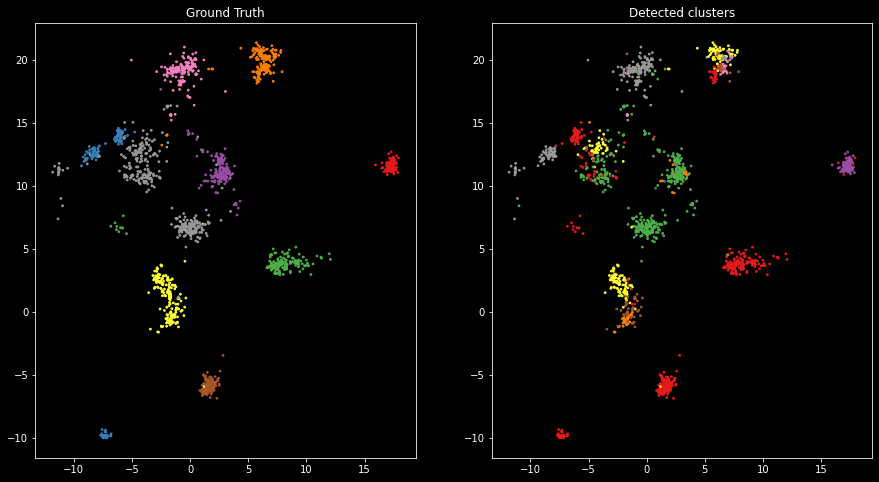

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
axs[0].scatter(
    x=embedding[:,0],
    y=embedding[:,1],
    c=mnist_y,
    s=3,
    cmap="Set1"
)
axs[0].set_title("Ground Truth")

axs[1].scatter(
    x=embedding[:,0],
    y=embedding[:,1],
    c=clusters,
    cmap="Set1",
    s=3,
)
axs[1].set_title("Detected clusters")

In [16]:
import numpy as np
import pandas as pd

In [22]:
data = np.load("clusterable_data.npy")
clusterer = DS2LSOM(threshold=2, n_prototypes=300, method="som")
pred = clusterer.fit(data).predict(data)

Text(0.5, 1.0, 'Ground Truth')

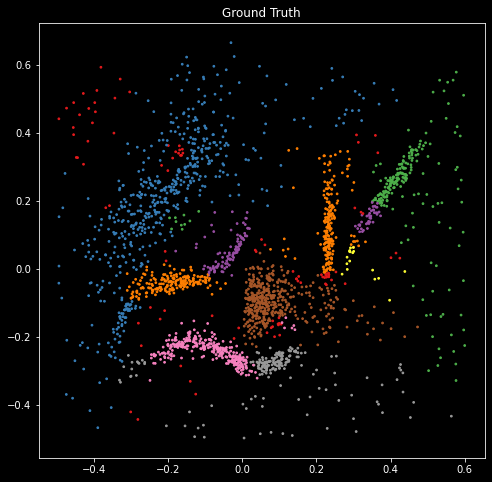

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    x=data[:,0],
    y=data[:,1],
    c=pred,
    s=3,
    cmap="Set1"
)
ax.set_title("Detected clusters")